# Importing the required libraries for EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading the data into the data frame.
df = pd.read_csv(r"/content/lingualsense_dataset.csv")

In [3]:
df.head(100)

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
95,tempore imperii romani thermae -arum fpl verbu...,Latin
96,ei fuerunt occisi icum accusationibus falsis e...,Latin
97,a talk by takis fotopoulos about the internati...,English
98,نن ټکی اسیا په خپل کاري مجال کې وتوانېدل چې په...,Pushto


In [4]:
df.describe()

,Text,Language
count,32337,32337
unique,32126,30
top,haec commentatio automatice praeparata res ast...,English
freq,48,2385


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [6]:
df["Language"].value_counts()

,count
Language,
English,2385
French,2014
Spanish,1819
Russian,1692
Dutch,1546
Arabic,1536
Turkish,1474
Tamil,1469
Hindi,1063


# Dropping the duplicate rows

In [7]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)
df.count()

Number of duplicate rows:  (207, 2)


,0
Text,32337
Language,32337


In [8]:
df = df.drop_duplicates()
df.count()

,0
Text,32130
Language,32130


# Dropping the missing or null values.

In [9]:
# Checking missing values
df.isnull().sum()

,0
Text,0
Language,0


# Univariate Analysis of Categorical Columns

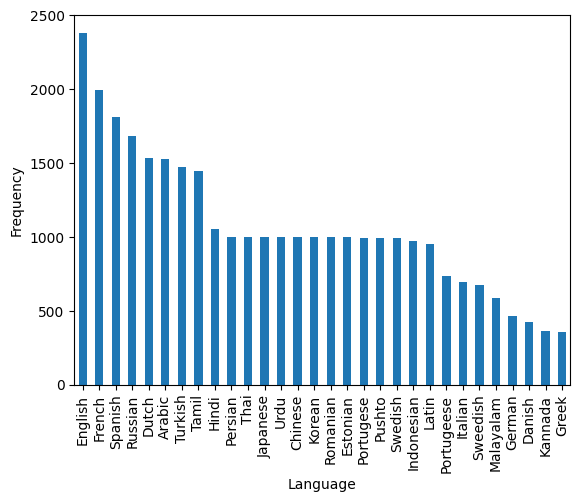

In [10]:
df["Language"].value_counts().plot(kind = "bar")
plt.ylabel("Frequency")
plt.show()


# language_index = df["Language"].value_counts()
# plt.figure(figsize=(8, 6))
# plt.bar(language_index.index, language_index, color = 'pink')
# plt.title("Count plot of language")
# plt.xlabel("Language")
# plt.ylabel("Frequency")
# plt.show()

<Axes: ylabel='count'>

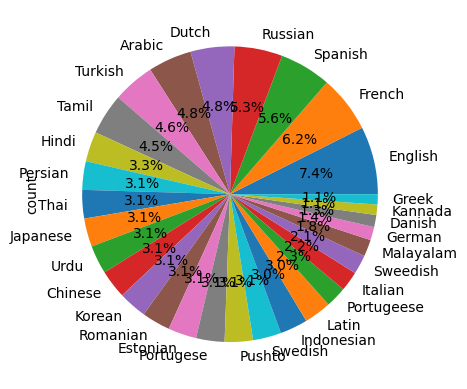

In [11]:
df["Language"].value_counts().plot(kind = "pie",autopct = "%1.1f%%" )

# Feature Extraction and Label Encoding

## Label Encoding

In [12]:
# Cleaning the texts in dataset
import re
def clean_text(text):
  # Remove backslashes, line breaks, and extra whitespaces
  text = re.sub(r'\\', '', text)       # Remove backslashes
  text = re.sub(r'\n', ' ', text)      # Replace line breaks with a space
  text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space

  # Remove special characters except for non-English text
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = re.sub(r'\d+', '', text)      # Remove numbers

  # Remove leading and trailing whitespaces
  text = text.strip()

  return text

In [13]:
df['Cleaned_text'] = df['Text'].apply(clean_text)
# Convert text to lowercase
df['Cleaned_text'] = df['Cleaned_text'].str.lower()

print(df['Cleaned_text'])

0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas på eng the jesuits...
2        ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...
3        வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
32332             ನಮಮ ತಪಪ ಏನ ಬದದಯದರ ಆ ದನದದ ನಮಗ ಒಳಳಯದನನ ನಡಣ
32333    ನರಸಸ ತನ ಮದಲಗ ಹಣಗಡತತದದ ಮರಗಗಳನನ ಬದಲಯಸದಳ ಆದರ ನಧನವ...
32334    ಹಗ  ನರಸಸಸಮ ಈಗ ಮರಯನ ಅವರಗ ಸಭವಸದ ಎಲಲವನನ ಹಳದ ಮತತ ಅ...
32335          ಅವಳ ಈಗ ಹಚಚ ಚನನದ ಬರಡ ಬಯಸವದಲಲ ಎದ ನನ ess ಹಸದದನ
32336    ಟರರ ನವ ನಜವಗಯ ಆ ದವದತನತ ಸವಲಪ ಕಣತತದದರ ಆದರ ನನ ಏನ ನ...
Name: Cleaned_text, Length: 32130, dtype: object


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
df['Language_encoded'] = label_encoding.fit_transform(df['Language'])
print(df[['Text', 'Language']])
print(df[['Cleaned_text', 'Language', 'Language_encoded']])

                                                    Text  Language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
32332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...   Kannada
32333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...   Kannada
32334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...   Kannada
32335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...   Kannada
32336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...   Kannada

[32130 rows x 2 columns]
                                            Cleaned_text  Language  \
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian   
1      sebes joseph pereira th

## Feature Extraction using Bag-Of-Words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000)
bag_of_words_features = cv.fit_transform(df['Cleaned_text'])
bag_of_words_df = pd.DataFrame(bag_of_words_features.toarray(), columns=cv.get_feature_names_out())
print("Bag of words features: ")
bag_of_words_df

Bag of words features: 


,aan,aantal,aasta,aastal,aastast,aastatel,ab,abad,about,abril,...,하는,하였다,하지만,한다,한편,함께,했다,현재,호드의,힘을
0,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(bag_of_words_df.nunique)

<bound method DataFrame.nunique of        aan  aantal  aasta  aastal  aastast  aastatel  ab  abad  about  abril  \
0        0       0      0       1        0         2   0     0      0      0   
1        0       0      0       0        0         0   0     0      0      0   
2        0       0      0       0        0         0   0     0      0      0   
3        0       0      0       0        0         0   0     0      0      0   
4        0       0      0       0        0         0   0     0      0      0   
...    ...     ...    ...     ...      ...       ...  ..   ...    ...    ...   
32125    0       0      0       0        0         0   0     0      0      0   
32126    0       0      0       0        0         0   0     0      0      0   
32127    0       0      0       0        0         0   0     0      0      0   
32128    0       0      0       0        0         0   0     0      0      0   
32129    0       0      0       0        0         0   0     0      0      0   

    

## Splitting the dataset into the Training set and Test set

In [21]:
X = bag_of_words_df
y = df['Language_encoded']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

print("Test data size: ", X_test.shape[0])
print("Train data size: ", X_train.shape[0])

Test data size:  6426
Train data size:  25704


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training different models on the Training set

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train each model
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(X_train, y_train)

decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_classifier.fit(X_train, y_train)

svc_classifier = SVC(kernel='rbf', random_state=0)
svc_classifier.fit(X_train, y_train)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

random_forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
random_forest_classifier.fit(X_train, y_train)

# Predictions for test set
logistic_pred = logistic_classifier.predict(X_test)
decision_tree_pred = decision_tree_classifier.predict(X_test)
svc_pred = svc_classifier.predict(X_test)
naive_bayes_pred = naive_bayes_classifier.predict(X_test)
random_forest_pred = random_forest_classifier.predict(X_test)

# Calculate and print accuracy for each model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, decision_tree_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))
print("GaussianNB Accuracy:", accuracy_score(y_test, naive_bayes_pred))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, random_forest_pred))


Logistic Regression Accuracy: 0.8881107998755058
Decision Tree Classifier Accuracy: 0.8507625272331155
SVC Accuracy: 0.8000311235605353
GaussianNB Accuracy: 0.8599439775910365
Random Forest Classifier Accuracy: 0.8820417055711174


# Classification report and confusion matrix for each model


In [24]:
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       298
           1       0.19      0.06      0.09       201
           2       0.92      0.85      0.88        79
           3       0.99      0.95      0.97       292
           4       0.92      0.92      0.92       443
           5       0.96      0.93      0.95       204
           6       0.98      0.95      0.96       419
           7       0.96      0.88      0.92        81
           8       1.00      0.84      0.91        76
           9       0.98      0.95      0.97       206
          10       0.98      0.95      0.97       195
          11       0.90      0.88      0.89       138
          12       0.30      0.95      0.45       200
          13       0.97      0.87      0.92        70
          14       1.00      0.95      0.97       230
          15       0.94      0.93      0.94       202
          16       1.00      0.66   

In [25]:
print("\nDecision Tree Classifier Classification Report:\n", classification_report(y_test, decision_tree_pred))
print("Decision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, decision_tree_pred))


Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       298
           1       0.32      0.04      0.08       201
           2       0.77      0.75      0.76        79
           3       0.94      0.92      0.93       292
           4       0.83      0.88      0.85       443
           5       0.95      0.93      0.94       204
           6       0.93      0.90      0.91       419
           7       0.77      0.78      0.77        81
           8       1.00      0.83      0.91        76
           9       0.99      0.96      0.97       206
          10       0.99      0.96      0.97       195
          11       0.84      0.77      0.80       138
          12       0.27      0.96      0.42       200
          13       1.00      0.87      0.93        70
          14       0.98      0.89      0.93       230
          15       0.90      0.81      0.85       202
          16       1.00      0.

In [26]:
print("\nSVC Classification Report:\n", classification_report(y_test, svc_pred))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))


SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       298
           1       0.07      0.02      0.04       201
           2       0.96      0.67      0.79        79
           3       1.00      0.85      0.92       292
           4       0.82      0.90      0.86       443
           5       1.00      0.86      0.93       204
           6       0.98      0.89      0.93       419
           7       0.96      0.79      0.86        81
           8       1.00      0.61      0.75        76
           9       1.00      0.81      0.89       206
          10       1.00      0.85      0.92       195
          11       0.98      0.75      0.85       138
          12       0.22      0.97      0.35       200
          13       1.00      0.77      0.87        70
          14       1.00      0.86      0.92       230
          15       0.98      0.84      0.90       202
          16       1.00      0.60      0.75       11

In [27]:
print("\nGaussianNB Classification Report:\n", classification_report(y_test, naive_bayes_pred))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_pred))


GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       298
           1       0.44      0.04      0.07       201
           2       0.92      0.90      0.91        79
           3       0.96      0.93      0.95       292
           4       0.89      0.92      0.90       443
           5       0.96      0.92      0.94       204
           6       0.98      0.95      0.96       419
           7       0.91      0.89      0.90        81
           8       0.99      0.88      0.93        76
           9       0.99      0.99      0.99       206
          10       0.96      0.96      0.96       195
          11       0.86      0.91      0.89       138
          12       0.16      0.03      0.04       200
          13       0.11      1.00      0.19        70
          14       0.99      0.96      0.97       230
          15       0.93      0.92      0.93       202
          16       1.00      0.66      0.80  

In [28]:
print("\nRandom Forest Classifier Classification Report:\n", classification_report(y_test, random_forest_pred))
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, random_forest_pred))


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       298
           1       0.33      0.03      0.06       201
           2       0.85      0.81      0.83        79
           3       0.98      0.94      0.96       292
           4       0.85      0.97      0.91       443
           5       0.98      0.94      0.96       204
           6       0.96      0.93      0.94       419
           7       0.83      0.84      0.83        81
           8       1.00      0.84      0.91        76
           9       1.00      0.98      0.99       206
          10       0.99      0.97      0.98       195
          11       0.87      0.81      0.84       138
          12       0.29      0.95      0.44       200
          13       1.00      0.87      0.93        70
          14       0.99      0.93      0.96       230
          15       0.96      0.90      0.93       202
          16       1.00      0.